In [1]:
include("continuous_hopfield.jl")
using .CH
using Plots

Take three patterns $\vec{\xi}_{1}$, $\vec{\xi}_{2}$ and $\vec{\xi}_{3}$. Those three patterns are points in the d-dimensional space and thus they define a plane. The goal is to obtain other points on the same plane and compute the energy for each of them. A new pattern can be found as: $$ \vec{\xi}_{new} = \vec{\xi}_{1} + \alpha_1 (\vec{\xi}_{2} - \vec{\xi}_{1}) + \alpha_2 (\vec{\xi}_{3} - \vec{\xi}_{1}),$$
where $$ 0 \leq \alpha_i \leq 1 $$

In [2]:
M = 30
N = 20
ξ = generate_patterns(M, N)
σ1, σ2, σ3 = ξ[:, 1], ξ[:, 2], ξ[:, 3]

([-0.9173210804834022, -1.0097582631124777, 1.0611071659687623, 1.7621273847126115, -0.12531284613677068, -1.0115302324967073, 0.8916275460080535, 0.020757421409808536, 1.2053937683854645, -0.6970643606133091, 0.3540880028524971, 0.5358742845010865, 0.13836801938476603, 0.8655041078632024, -0.4059681574156271, -1.2403332849112507, -1.4559121431989601, 0.26077077572400825, 1.1779075507423495, -1.1695491526159636], [-1.7278507113316268, -0.004101861375484184, 0.41050006753867, -0.4132880221852957, -1.0710855809745037, -0.8247160918619177, 0.6194586085917737, 1.9220133296762258, 0.8896132286784947, -0.2300399732759702, -0.33605609995431474, -0.3449380968418007, -0.3264862721754092, -0.5658530296822729, -0.11406097249542065, -0.25301192354077373, -0.4728277305876929, 2.2086686356857346, -0.41474874197494555, -0.29352712552084326], [2.2000319450770713, 1.3950659929116327, -1.0622774254958949, -0.3957662536768519, -0.7116781118103838, 0.1580021858129122, -1.4168009300086306, 0.45637775240265

In [3]:
α1 = range(-1, 2, length = 150)
α2 = range(-1, 2, length = 150)

Z = zeros(length(α1), length(α2))

for i in 1:length(α1)
    a = α1[i]
    for j in 1:length(α2)
        σ_new = σ1 + a*(σ2 - σ1) + α2[j]*(σ3 -σ1)
        Z[i, j] = energy(σ_new, ξ, 1, 1)
    end
end

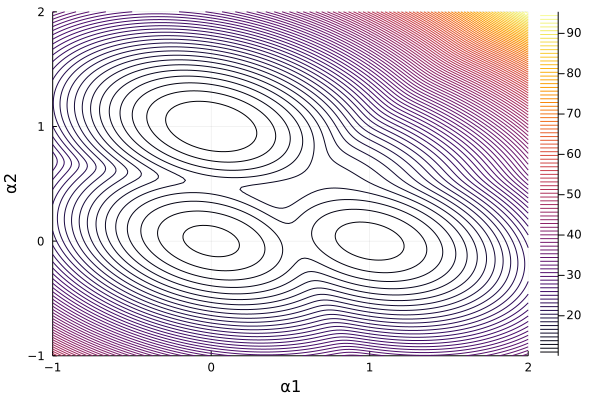

In [4]:
Plots.contour(α1, α2, Z', levels = 90, xlabel = "α1", ylabel = "α2")


In [5]:
energy(σ1, ξ, 1, 1)

10.647508654578429

In [6]:
energy(σ2, ξ, 1, 1)

11.410163575107868

In [7]:
energy(σ3, ξ, 1, 1)

10.070627784400497